# 데이터 준비하기

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 음악데이터

In [185]:
songs=pd.read_csv('/content/songs.csv',index_col=0)
songs.info()
songs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      603 non-null    object 
 1   artist     603 non-null    object 
 2   top genre  603 non-null    object 
 3   year       603 non-null    int64  
 4   bpm        603 non-null    int64  
 5   nrgy       603 non-null    int64  
 6   dnce       603 non-null    int64  
 7   dB         603 non-null    int64  
 8   live       603 non-null    int64  
 9   val        603 non-null    int64  
 10  dur        603 non-null    int64  
 11  acous      603 non-null    int64  
 12  spch       603 non-null    int64  
 13  pop        591 non-null    float64
dtypes: float64(1), int64(10), object(3)
memory usage: 70.7+ KB


,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83.0
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82.0
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80.0
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79.0
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78.0


# 데이터 전처리

### 필요한 columns만 뽑고,top genre가 숫자인 데이터들을 삭제


In [186]:
songs=songs[['title','artist','year','top genre','bpm','nrgy','dB','dnce']]
songs=songs[(songs['top genre']!='2011') & (songs['top genre']!='2013') & (songs['top genre'] != '2014')
& (songs['top genre']!='2015') & (songs['top genre']!='2016') & (songs['bpm']!=0)]

In [187]:
print(songs['top genre'].unique())
print(songs.columns)

['neo mellow' 'detroit hip hop' 'dance pop' 'pop' 'canadian pop' 'hip pop'
 'barbadian pop' 'atl hip hop' 'australian pop' 'indie pop' 'art pop'
 'colombian pop' 'big room' 'british soul' 'chicago rap' 'acoustic pop'
 'permanent wave' 'boy band' 'baroque pop' 'celtic rock' 'electro'
 'complextro' 'canadian hip hop' 'candy pop' 'alaska indie' 'folk-pop'
 'metropopolis' 'house' 'australian hip hop' 'electropop'
 'australian dance' 'hollywood' 'canadian contemporary r&b'
 'irish singer-songwriter' 'tropical house' 'belgian edm'
 'french indie pop' 'hip hop' 'danish pop' 'latin' 'canadian latin'
 'electronic trap' 'edm' 'electro house' 'downtempo' 'brostep'
 'contemporary country' 'moroccan pop' 'escape room' 'alternative r&b']
Index(['title', 'artist', 'year', 'top genre', 'bpm', 'nrgy', 'dB', 'dnce'], dtype='object')


## 인기장르의 순위

In [188]:
print(songs.shape)
print(songs['top genre'].unique())

(590, 8)
['neo mellow' 'detroit hip hop' 'dance pop' 'pop' 'canadian pop' 'hip pop'
 'barbadian pop' 'atl hip hop' 'australian pop' 'indie pop' 'art pop'
 'colombian pop' 'big room' 'british soul' 'chicago rap' 'acoustic pop'
 'permanent wave' 'boy band' 'baroque pop' 'celtic rock' 'electro'
 'complextro' 'canadian hip hop' 'candy pop' 'alaska indie' 'folk-pop'
 'metropopolis' 'house' 'australian hip hop' 'electropop'
 'australian dance' 'hollywood' 'canadian contemporary r&b'
 'irish singer-songwriter' 'tropical house' 'belgian edm'
 'french indie pop' 'hip hop' 'danish pop' 'latin' 'canadian latin'
 'electronic trap' 'edm' 'electro house' 'downtempo' 'brostep'
 'contemporary country' 'moroccan pop' 'escape room' 'alternative r&b']


### top genre의 수가 많아 count한 결과 top 15의 장르들만 추출


In [189]:
genre_rank=songs.groupby('top genre').count()
genre_rank=genre_rank.sort_values('title',ascending=False)
genre_rank=genre_rank[:15].index
genre_rank=np.array(genre_rank)
print(genre_rank)
songs=songs[songs['top genre'].isin(genre_rank)]
songs.head()
# genre_rank=songs[(songs['top genre'] in genre_rank)]

['dance pop' 'pop' 'canadian pop' 'boy band' 'barbadian pop' 'electropop'
 'british soul' 'big room' 'canadian contemporary r&b' 'neo mellow'
 'art pop' 'hip pop' 'complextro' 'australian dance' 'australian pop']


,title,artist,year,top genre,bpm,nrgy,dB,dnce
1,"Hey, Soul Sister",Train,2010,neo mellow,97,89,-4,67
3,TiK ToK,Kesha,2010,dance pop,120,84,-3,76
4,Bad Romance,Lady Gaga,2010,dance pop,119,92,-4,70
5,Just the Way You Are,Bruno Mars,2010,pop,109,84,-5,64
6,Baby,Justin Bieber,2010,canadian pop,65,86,-5,73


### 각장르들의 BPM 평균값 도출

In [190]:
mean_bpm_by_genre=songs.groupby('top genre').bpm.mean()
mean_bpm_by_genre

top genre
art pop                      115.125000
australian dance             128.833333
australian pop               153.800000
barbadian pop                125.333333
big room                     122.300000
boy band                     116.133333
british soul                 128.400000
canadian contemporary r&b    127.000000
canadian pop                 121.500000
complextro                   120.333333
dance pop                    118.393651
electropop                   112.846154
hip pop                      100.666667
neo mellow                   109.111111
pop                          117.066667
Name: bpm, dtype: float64

In [191]:
songs_by_bpm=songs.sort_values('bpm')
print(songs['top genre'].unique())
result=songs[(songs['top genre']=='dance pop') | (songs['top genre']=='pop')]
result=result[['title','artist','top genre','year','bpm','nrgy','dB']]
result.rename(columns={'top genre':'genre'},inplace=True)
print(len(result))
print(result.columns)
compression_opts = dict(method='zip',
                        archive_name='result.csv')  
result.to_csv('result.zip', index=False,
          compression=compression_opts)  
print(len(result))
songs.groupby('top genre').mean()

['neo mellow' 'dance pop' 'pop' 'canadian pop' 'hip pop' 'barbadian pop'
 'australian pop' 'art pop' 'big room' 'british soul' 'boy band'
 'complextro' 'electropop' 'australian dance' 'canadian contemporary r&b']
375
Index(['title', 'artist', 'genre', 'year', 'bpm', 'nrgy', 'dB'], dtype='object')
375


,year,bpm,nrgy,dB,dnce
top genre,,,,,
art pop,2014.875000,115.125000,60.125000,-8.000000,52.375000
australian dance,2015.666667,128.833333,72.000000,-4.500000,45.833333
australian pop,2011.600000,153.800000,74.400000,-4.400000,64.000000
barbadian pop,2012.866667,125.333333,68.466667,-5.000000,62.066667
big room,2014.900000,122.300000,77.200000,-4.900000,60.900000
boy band,2014.400000,116.133333,80.266667,-4.266667,63.800000
british soul,2014.600000,128.400000,56.200000,-5.900000,58.000000
canadian contemporary r&b,2016.000000,127.000000,64.777778,-6.333333,54.555556
canadian pop,2015.294118,121.500000,68.117647,-6.088235,63.735294


### 년도별 인기장르비율
    * 매년마다 dance pop,pop의 비율이 압도적으로 많음

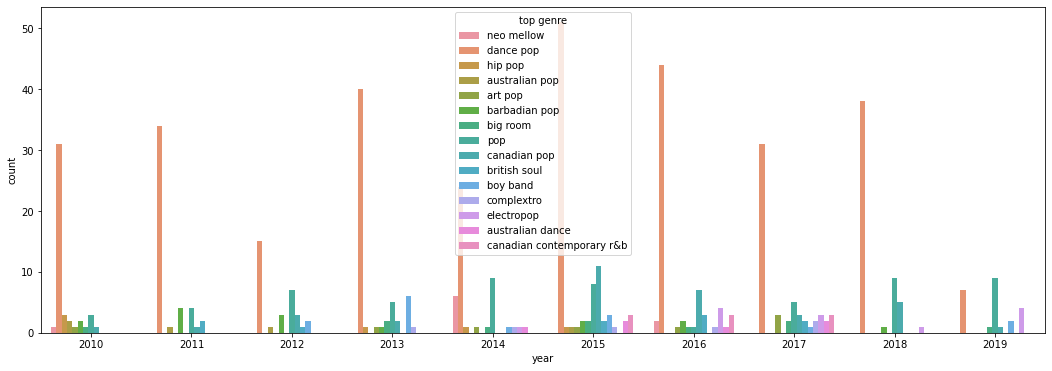

In [192]:
songs=songs.sort_values('year').reset_index(drop=True)
songs['id']=[x for x in range(len(songs))]

plt.figure(figsize=(18,6))
sns.countplot(x="year",hue="top genre",data=songs)

## 2010~2019년도까지의 장르들의 비율
    * 차례대로 dance pop,pop,canadian pop,barbadian pop,boy band,electropop순으로 많음 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

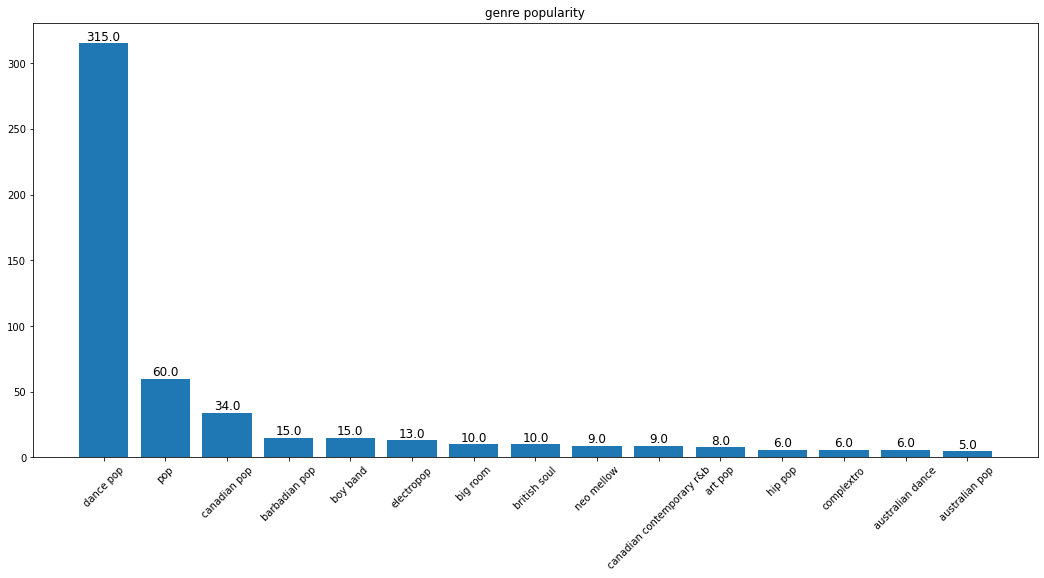

In [193]:
plt.figure(figsize=(18,8))
gen=songs['top genre'].value_counts()
bar=plt.bar(gen.index,gen)
# print(sub['bpm'].sort_values(ascending=False))
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
plt.title('genre popularity')
plt.xticks(rotation=45)

## 장르별 평균 Dnce 와 장르별 평균 BPM
    * 인기가 높았던 장르일수록 dnce가 대체로 높다.
    * 인기가 높았던 상위 7개장르들의 bpm분포는 랜덤하지않고 대체로 112~126에 몰려있다.

Text(0.5, 1.0, 'bpm by genre')

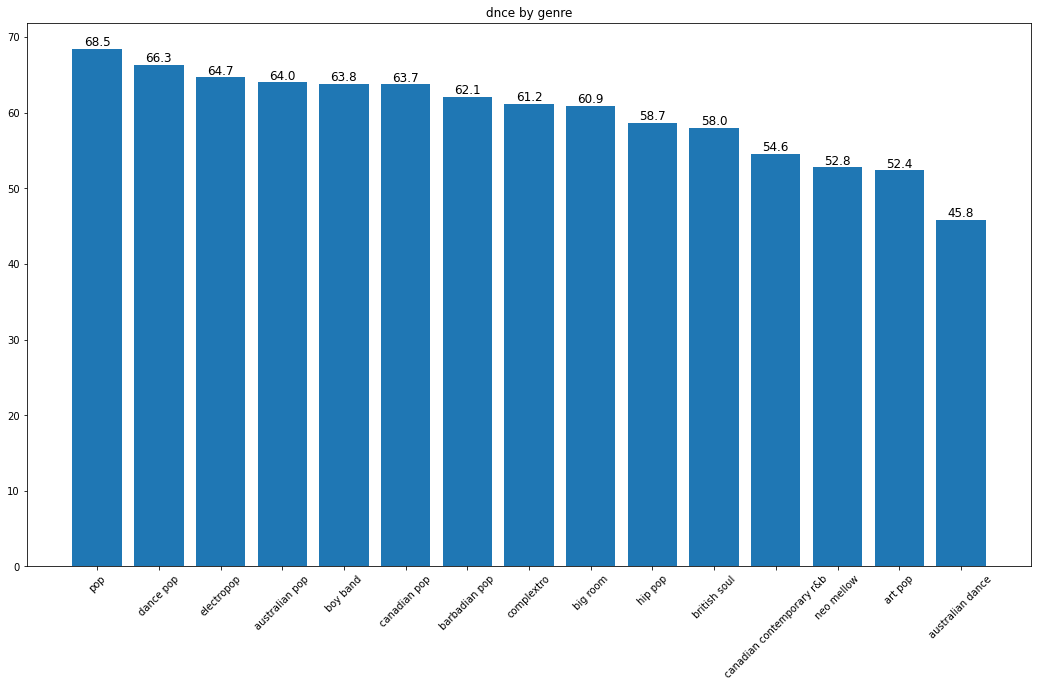

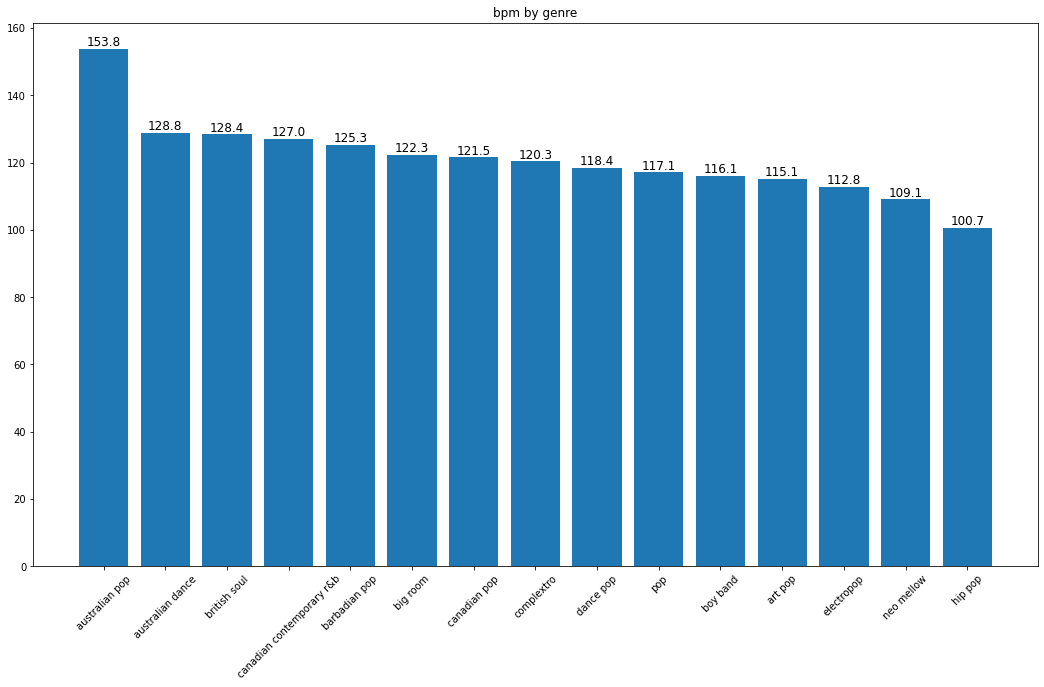

In [194]:
plt.figure(figsize=(18,10))
sub=songs.groupby('top genre').mean().sort_values('dnce',ascending=False)
bar=plt.bar(sub.index,sub['dnce'])
plt.xticks(rotation=45)
plt.title('dnce by genre')
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
plt.figure(figsize=(18,10))
bar=plt.bar(sub['bpm'].sort_values(ascending=False).index,sub['bpm'].sort_values(ascending=False))
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
plt.xticks(rotation=45)
plt.title('bpm by genre')

## 년도에 따른 장르별 bpm
    * 최근으로 올수록 인기장르들의 평균bpm들이 점점 떨어지고 있음

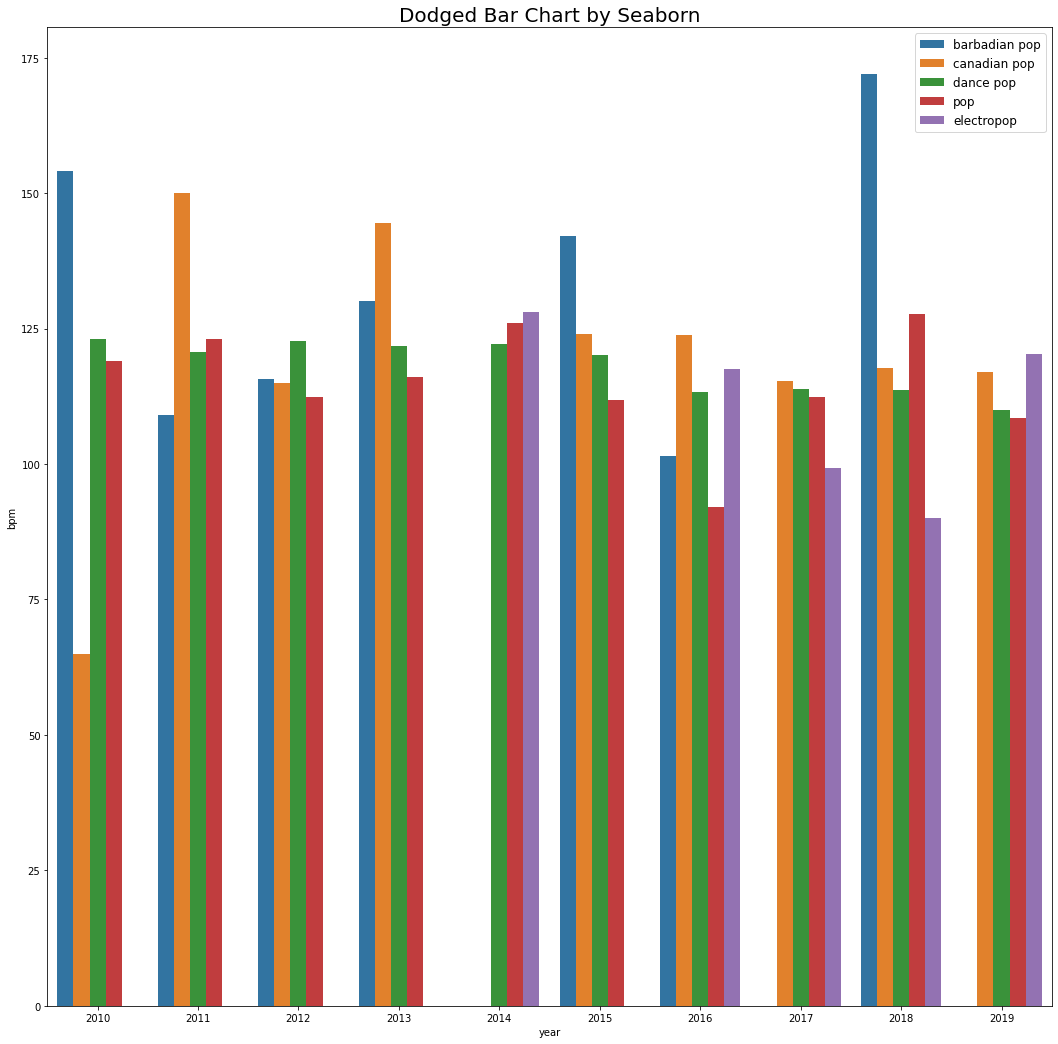

In [196]:
year_bpm=songs.groupby(['year','top genre']).bpm.mean()
year_bpm=year_bpm.reset_index()
# print(year_bpm.head(20))
plt.figure(figsize=(18,18))
year_bpm=year_bpm[(year_bpm['top genre']=='dance pop') | (year_bpm['top genre']=='pop') | (year_bpm['top genre']=='electropop') | (year_bpm['top genre']=='canadian pop') | (year_bpm['top genre']=='barbadian pop') | (year_bpm['top genre']=='boyband')]
sns.barplot(x='year', y='bpm',hue='top genre', data=year_bpm) # default : dodge=True

plt.title('Dodged Bar Chart by Seaborn', fontsize=20)

plt.legend(fontsize=12)





## 분석결과
    1.bpm의 범위는 112~126,dnce는 높을 수록 인기가 있을 음악일 확률이 높다
    2.해마다 인기장르들의 음악의 평균 bpm은 낮아지고 있다.